In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

Cargamos el archivo y comprobamos que los datos efectivamente están limpios

In [14]:
df = pd.read_csv('Train_recoded.csv')
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
Name            0
Transported     0
Algun_Gasto     0
CabinDeck       0
CabinSide       0
Group           0
GroupNumber     0
Last Name       0
Solo            0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Gastos          0
CabinNumber     0
GroupSize       0
AgeGroup        0
dtype: int64

Recoficamos las variables categóricas en numéricas asignandoles valores numéricos en orden (0, 1, 2...)

In [15]:
df.loc[:, 'HomePlanet'] = df['HomePlanet'].map({'Europa': 0, 'Earth': 1, 'Mars': 2}).astype(int)
df.loc[:, 'CabinDeck'] = df['CabinDeck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}).astype(int)
df.loc[:, 'CabinSide'] = df['CabinSide'].map({'P': 0, 'S': 1})
df.loc[:, 'CryoSleep'] = df['CryoSleep'].astype(int)
df.loc[:, 'Destination'] = df['Destination'].map({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}).astype(int)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_1052\2690992866.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[:, 'CryoSleep'] = df['CryoSleep'].astype(int)


Separamos los conjuntos de entrenamiento y test, se eliminan además aquellas columnas que no vayan a usarse para el entrenamiento.

In [16]:
columnas_no_usadas = ["PassengerId", "Name", "Last Name", "Cabin"]

df = df.drop(columns = columnas_no_usadas)

features_eliminadas = ['Solo']


y = df['Transported']
X = df.drop(['Transported'] + features_eliminadas, axis = 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

eval_set = [(X_train, y_train), (X_test, y_test)]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
model = Sequential()

# Añadir capas
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],),  kernel_regularizer=l2(0.0004)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.0004)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Clasificación binaria

nadam = Nadam(learning_rate=0.000013) #0.000098

model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, 
                    batch_size=64, callbacks=[reduce_lr, early_stopping])

Epoch 1/100


e:\Bootcamp\Titanic Spaceship\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5342 - loss: 0.8622 - val_accuracy: 0.6804 - val_loss: 0.6425 - learning_rate: 0.0010
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6430 - loss: 0.6915 - val_accuracy: 0.7482 - val_loss: 0.5768 - learning_rate: 0.0010
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6943 - loss: 0.6268 - val_accuracy: 0.7688 - val_loss: 0.5400 - learning_rate: 0.0010
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7040 - loss: 0.5906 - val_accuracy: 0.7795 - val_loss: 0.5193 - learning_rate: 0.0010
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7332 - loss: 0.5688 - val_accuracy: 0.7812 - val_loss: 0.5068 - learning_rate: 0.0010
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7352 - loss: 0.5616 - val_accuracy: 0.7866 - val_loss: 0.4980 - learning_rate: 0.0010
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7619 - loss: 0.5440 - val_accuracy: 0.788

Sacamos los resultados de accuracy, validación cruzada y pintamos los gráficos de curva roc y matriz de confusión

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


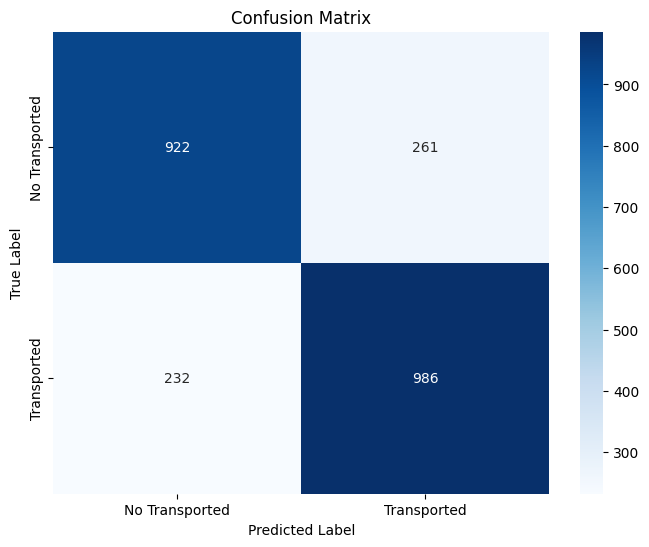

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.78      0.79      1183
        True       0.79      0.81      0.80      1218

    accuracy                           0.79      2401
   macro avg       0.79      0.79      0.79      2401
weighted avg       0.79      0.79      0.79      2401



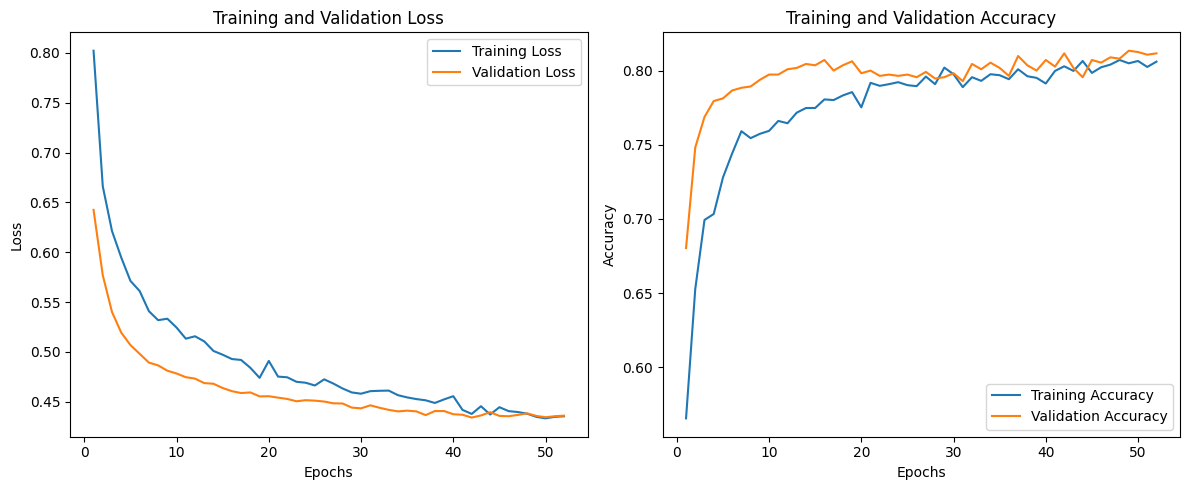

In [26]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a clases (0 o 1)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Transported', 'Transported'], yticklabels=['No Transported', 'Transported'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Graficar el historial de pérdida (loss) y precisión (accuracy)
# Obtener los valores de 'loss' y 'accuracy' del entrenamiento
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Graficar la pérdida (loss)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar la precisión (accuracy)
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Una vez entrenado podemos aplicar el modelo a los datos

In [36]:
df_t = pd.read_csv('Test_recoded.csv')

df_test = df_t.drop(columns = ['Transported'] + columnas_no_usadas + features_eliminadas)

df_test.loc[:, 'HomePlanet'] = df_test['HomePlanet'].map({'Europa': 0, 'Earth': 1, 'Mars': 2}).astype(int)
df_test.loc[:, 'CabinDeck'] = df_test['CabinDeck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}).astype(int)
df_test.loc[:, 'CabinSide'] = df_test['CabinSide'].map({'P': 0, 'S': 1}).astype(int)
df_test.loc[:, 'CryoSleep'] = df_test['CryoSleep'].astype(int)
df_test.loc[:, 'Destination'] = df_test['Destination'].map({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2}).astype(int)

df_test = df_test.astype(int)

prediccion = model.predict(df_test)

df_predict = pd.DataFrame({
    'PassengerId': df_t['PassengerId'],
    'Transported': prediccion.astype(bool).flatten()
})

df_predict.to_csv('prediccion_nn.csv', index = False)

104/134 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step

C:\Users\Alberto\AppData\Local\Temp\ipykernel_1052\409815727.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 1 ... 1 0 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_test.loc[:, 'CryoSleep'] = df_test['CryoSleep'].astype(int)


134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step
